In [2]:

import numpy as np
import random
import pandas as p

#for plotting
import matplotlib.pyplot as plt
import os

#for dataset preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsRegressor #to import KNN regressor
from sklearn.metrics import mean_squared_error #for checking model performance
import pickle# to save trained machine learning model


In [3]:
def load_dataset(random_state):
    headers = ['cx','cy','cz','pcx','pcy','pcz']     
    df2 = p.read_csv('Dataset/sample ML test.csv')
    print (df2)
    print("Parsing Dataset")
    df2.head
    
    cx=df2['cx'].values
    cx=cx.astype('float64')
    
    cy=df2['cy'].values
    cy=cy.astype('float64')
    
    cz=df2['cz'].values
    cz=cz.astype('float64')
    
    pcx=df2['pcx'].values
    pcx=pcx.astype('float64')
    
    pcy=df2['pcy'].values
    pcy=pcy.astype('float64')
    
    pcz=df2['pcz'].values
    pcz=pcz.astype('float64')
        
    x_datas= np.column_stack((cx,cy,cz)) #stack the input data
    y_datas=np.column_stack((pcx,pcy,pcz))
    
    
    #dataset preprocessing
    scaler_x = preprocessing.MinMaxScaler().fit(x_datas)
    x_datas = scaler_x.transform(x_datas)
        
    
    scaler_y= preprocessing.MinMaxScaler().fit(y_datas)
    
    x_train, x_test_val, y_train, y_test_val = train_test_split(x_datas, y_datas, test_size=0.2)
    x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=0.5)
    print(x_train.shape)
    print(x_val.shape)
    print(x_test.shape)
        
    n_of_features = x_train.shape[0]
    print("Done Generating Dataset")
    return x_train,y_train,x_val,y_val,x_test,y_test,n_of_features,scaler_y

In [4]:

#training the KNN
def train_KNN(x_train ,y_train,x_val,y_val,x_test,y_test,scaler_y,random_state,trial_name):
    print("training knn")
    error_rate_validation=[]
    error_rate_test=[]
    error_rate_train=[]
    for x in range(2,n_of_features,1):
        reg_knn = KNeighborsRegressor(n_neighbors=x, metric='braycurtis', n_jobs=6)
        reg_knn.fit(x_train,y_train)
    
        
        y_predict_in_train = reg_knn.predict(x_train)
        y_predict_in_val = reg_knn.predict(x_val)
        y_predict = reg_knn.predict(x_test)
       

 
        error_rate_test.append(mean_squared_error(scaler_y.inverse_transform(y_test),scaler_y.inverse_transform(y_predict)))
        error_rate_validation.append(mean_squared_error(scaler_y.inverse_transform(y_val),scaler_y.inverse_transform(y_predict_in_val)))
        error_rate_train.append(mean_squared_error(scaler_y.inverse_transform(y_train),scaler_y.inverse_transform(y_predict_in_train)))

        filename = "KNN_saved_models/"+trial_name+' k= '+str(x)+'.sav'
        pickle.dump(reg_knn, open(filename, 'wb'))
    plt.plot(range(2,59),error_rate_train,color='blue',linestyle='solid',marker='o')
    plt.plot(range(2,59),error_rate_test,color='red',linestyle='solid',marker='o')
    plt.plot(range(2,59),error_rate_validation,color='green',linestyle='solid',marker='o')
    plt.xlim(2,20)
    plt.title(trial_name+" RMSE vs K. Value")
    plt.xlabel('K')
    plt.ylabel('RMSE')
    plt.legend(['train', 'test','validation'], loc='upper left')
    plt.savefig(trial_name+'_training.png')

        tx     ty     tz         cx         cy         cz    size  \
0    91.50 -84.50  -85.5   4.910685  -6.279029  13.929609  0.9900   
1    98.00 -40.50  -70.0   3.080508  -6.047901  16.767048  1.0015   
2    94.50 -40.50  -69.5   3.982370  -6.057839  13.574089  1.0000   
3    93.50 -37.00  -68.0   3.315530  -3.680198  15.063374  1.0000   
4    -5.50  -1.50   34.5   4.252589  -4.781314  15.996020  0.9700   
5    -5.00  -0.50   34.0   3.315530  -3.680198  15.063374  0.9700   
6    93.50 -39.50  -67.5   4.252589  -4.781314  15.996020  1.0015   
7    -4.00  -4.00   33.5  -0.716391  -7.083383  12.951243  0.9300   
8   101.75 -42.00  -73.5   3.080508  -6.047901  16.767048  1.0500   
9    92.25 -41.00  -69.0   2.811737  -5.484210  11.778398  1.0000   
10   87.50 -87.00  -88.5   2.811737  -5.484210  11.778398  1.0000   
11   87.11 -84.50  -86.0   5.225854  -6.486866  13.573324  0.9995   
12   94.00 -38.50  -69.5   1.721920  -3.539681  12.160388  1.0000   
13   98.50 -40.00   69.0   5.11928

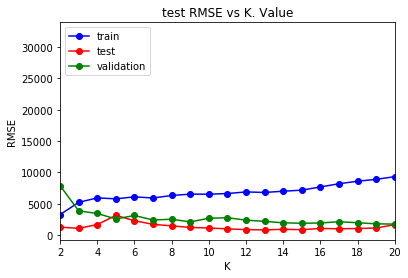

In [5]:

random_state = 42
os.environ['PYTHONHASHSEED'] = "42"
np.random.seed(42)
random.seed(42)

x_train,y_train,x_val,y_val,x_test,y_test,n_of_features,scaler_y = load_dataset(random_state)
train_KNN(x_train ,y_train,x_val,y_val,x_test,y_test,scaler_y,random_state,"test")


In [6]:

loaded_model = pickle.load(open('KNN_saved_models/test k= 12.sav', 'rb'))
result = loaded_model.predict(np.array([[6.63518038,- 4.37991231,- 0.06342713]]))
print("Predicted Values: PCX: ",result[0][0]," PCY: ",result[0][1], " PCZ: ",result[0][2])

Predicted Values: PCX:  18.667539095000002  PCY:  0.5905520133333332  PCZ:  2.1339559599999998
